In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('ml_source_files/house_price.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


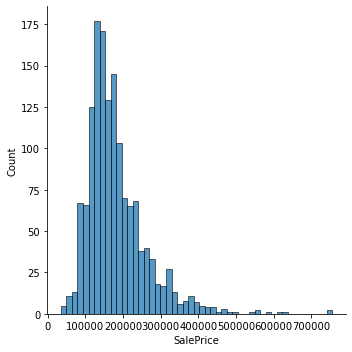

In [8]:
sns.displot(df['SalePrice'])

In [10]:
# nan값의 수 기준 상위 5개의 칼럼을 삭제
# 나머지 칼럼의 칼럼값의 평균값으로 nan값을 채우시오

In [16]:
drop_idx = df.isnull().sum().sort_values(ascending = False)[:5].index
df.drop(drop_idx, axis = 1, inplace = True)

In [18]:
df.fillna(df.mean(), inplace=True)

In [20]:
df.drop('Id', axis = 1, inplace=True)

In [25]:
col_dtypes = df.dtypes == 'object'
col_dtypes[col_dtypes]

MSZoning         True
Street           True
LotShape         True
LandContour      True
Utilities        True
LotConfig        True
LandSlope        True
Neighborhood     True
Condition1       True
Condition2       True
BldgType         True
HouseStyle       True
RoofStyle        True
RoofMatl         True
Exterior1st      True
Exterior2nd      True
MasVnrType       True
ExterQual        True
ExterCond        True
Foundation       True
BsmtQual         True
BsmtCond         True
BsmtExposure     True
BsmtFinType1     True
BsmtFinType2     True
Heating          True
HeatingQC        True
CentralAir       True
Electrical       True
KitchenQual      True
Functional       True
GarageType       True
GarageFinish     True
GarageQual       True
GarageCond       True
PavedDrive       True
SaleType         True
SaleCondition    True
dtype: bool

In [26]:
df[col_dtypes[col_dtypes].index].isnull().sum()

MSZoning          0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
KitchenQual       0
Functional        0
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
PavedDrive        0
SaleType          0
SaleCondition     0
dtype: int64

In [28]:
# df에서 문자열 칼럼을 numeric type으로 모두 바꾸시오

df_ohe = pd.get_dummies(df)
df_ohe.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


In [29]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 271 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(34), uint8(234)
memory usage: 755.8 KB


In [31]:
(df_ohe.dtypes == 'object').sum()

0

In [32]:
df_ohe.isnull().sum().sum()

0

In [34]:
df_ohe.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


In [33]:
# LinearRegression 모델을 생성하고 평가하시오---(LinearRegression, Ridge, Lasso)

In [47]:
y = df_ohe['SalePrice']

x = df_ohe.drop('SalePrice', axis = 1)

In [48]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=111)

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error

In [64]:
lr = LinearRegression()
rid = Ridge()
las = Lasso()

model = [lr, rid, las]

for m in model:
    m.fit(x_train, y_train)
    preds = m.predict(x_test)
    accuracy = m.score(x_test, y_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    
    print('-')
    print(m.__class__.__name__)
    print('accuracy :', accuracy)
    print('rmse :', rmse)

-
LinearRegression
accuracy : 0.8687479259359544
rmse : 30945.303958794877
-
Ridge
accuracy : 0.8668559502795903
rmse : 31167.54151341282
-
Lasso
accuracy : 0.8865564398427328
rmse : 28769.45197160167


In [57]:
# scale을 조절한 후 linear model로 예측하고 모델을 평가하시오

In [67]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
scaler = MinMaxScaler()

scaler.fit(x_train)

MinMaxScaler()

In [69]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [70]:
lr = LinearRegression()
rid = Ridge()
las = Lasso()

model = [lr, rid, las]

for m in model:
    m.fit(x_train_scaled, y_train)
    preds = m.predict(x_test_scaled)
    accuracy = m.score(x_test_scaled, y_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    
    print('---------------')
    print(m.__class__.__name__)
    print('accuracy :', accuracy)
    print('rmse :', rmse)

---------------
LinearRegression
accuracy : -5.842657188462012e+20
rmse : 2064652032639917.5
---------------
Ridge
accuracy : 0.861550773686921
rmse : 31782.41776857859
---------------
Lasso
accuracy : 0.8865627425705371
rmse : 28768.652770028584


In [71]:
# GridSearchCV

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
rid_params = {'alpha' : [0.005, 0.1, 1, 5, 8, 19, 12, 15, 20]}
las_params = {'alpha' : [0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1.5, 10]}

In [78]:
rid = Ridge()
las = Lasso()

grid = GridSearchCV(rid, param_grid = rid_params, refit = True, verbose = True)
grid.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0.005, 0.1, 1, 5, 8, 19, 12, 15, 20]},
             verbose=True)

In [79]:
grid.best_params_

{'alpha': 8}

In [80]:
grid.best_score_

0.8285873290397511